In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp_global = pd.read_csv('../data/cleaned/global_temperatures_cleaned.csv')
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_1980_2012_cleaned.csv')

In [3]:
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty
0,36,1753-01-01,2.039,3.478
1,37,1753-02-01,0.715,6.341
2,38,1753-03-01,5.424,2.929
3,39,1753-04-01,8.272,3.177
4,40,1753-05-01,12.186,3.111
...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072
3152,3188,2015-09-01,12.999,0.079
3153,3189,2015-10-01,10.801,0.102
3154,3190,2015-11-01,7.433,0.119


In [4]:
temp_county

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
0,2834,1980-01-01,-4.073,0.518,Åland
1,2835,1980-02-01,-6.484,0.441,Åland
2,2836,1980-03-01,-3.947,0.466,Åland
3,2837,1980-04-01,2.928,0.597,Åland
4,2838,1980-05-01,6.154,0.241,Åland
...,...,...,...,...,...
93451,577448,2012-08-01,18.946,1.127,Zimbabwe
93452,577449,2012-09-01,22.609,0.643,Zimbabwe
93453,577450,2012-10-01,23.482,0.574,Zimbabwe
93454,577451,2012-11-01,24.606,0.532,Zimbabwe


In [5]:
country_top10_temp = ['United States','China','Russia','Japan','India','Germany','United Kingdom','Canada','Italy','France']

In [10]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
temp_county_top10.head()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
15048,99791,1980-01-01,-22.529,0.273,Canada
15049,99792,1980-02-01,-18.497,0.232,Canada
15050,99793,1980-03-01,-14.981,0.218,Canada
15051,99794,1980-04-01,-4.651,0.398,Canada
15052,99795,1980-05-01,4.375,0.223,Canada


In [11]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_21796\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [12]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_21796\1751133901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
15048,99791,1980-01-01,-22.529,0.273,Canada,1980
15049,99792,1980-02-01,-18.497,0.232,Canada,1980
15050,99793,1980-03-01,-14.981,0.218,Canada,1980
15051,99794,1980-04-01,-4.651,0.398,Canada,1980
15052,99795,1980-05-01,4.375,0.223,Canada,1980
...,...,...,...,...,...,...
89887,557807,2012-08-01,21.422,0.251,United States,2012
89888,557808,2012-09-01,17.036,0.185,United States,2012
89889,557809,2012-10-01,9.688,0.225,United States,2012
89890,557810,2012-11-01,3.330,0.120,United States,2012


In [13]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_21796\2060332134.py:1: FutureWarning: The provided callable <function mean at 0x0000020FC30AEF20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1980,-4.416917
1,Canada,1981,-2.867250
2,Canada,1982,-5.875167
3,Canada,1983,-4.751750
4,Canada,1984,-4.634250
...,...,...,...
325,United States,2008,8.951417
326,United States,2009,9.137083
327,United States,2010,9.505583
328,United States,2011,9.549917


<Axes: xlabel='year', ylabel='average_temperature'>

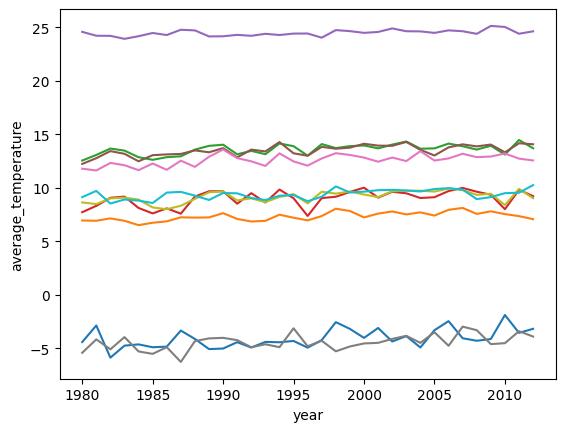

In [45]:
sns.lineplot(temp_county_top10_pivot, y='average_temperature', x='year', hue='country', legend=False)
#plt.xlim(1980, 2010)
#plt.ylim(4, 12)
#ax.legend(loc='upper right')

In [18]:
temp_global['date']=pd.to_datetime(temp_global['date'])

In [19]:
temp_global['year']= temp_global['date'].dt.year
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty,year
0,36,1753-01-01,2.039,3.478,1753
1,37,1753-02-01,0.715,6.341,1753
2,38,1753-03-01,5.424,2.929,1753
3,39,1753-04-01,8.272,3.177,1753
4,40,1753-05-01,12.186,3.111,1753
...,...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072,2015
3152,3188,2015-09-01,12.999,0.079,2015
3153,3189,2015-10-01,10.801,0.102,2015
3154,3190,2015-11-01,7.433,0.119,2015


In [20]:
temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()
temp_global_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_21796\1490844767.py:1: FutureWarning: The provided callable <function mean at 0x0000020FC30AEF20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()


,year,land_average_temperature
0,1753,8.388083
1,1754,8.469333
2,1755,8.355583
3,1756,8.849583
4,1757,9.022000
...,...,...
258,2011,9.516000
259,2012,9.507333
260,2013,9.606500
261,2014,9.570667


(4.0, 12.0)

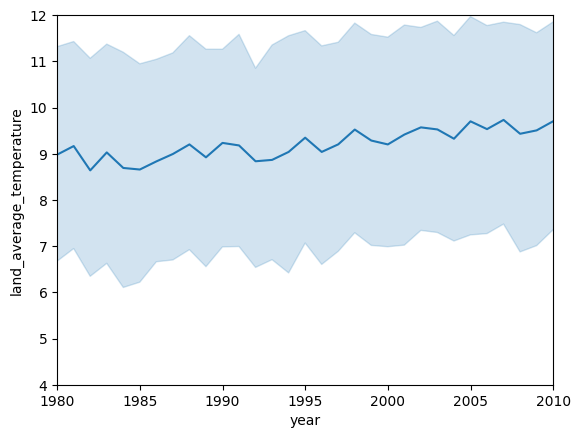

In [34]:
sns.lineplot(temp_global, y='land_average_temperature', x='year')
plt.xlim(1980, 2010)
plt.ylim(4, 12)

In [24]:
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty,year
0,36,1753-01-01,2.039,3.478,1753
1,37,1753-02-01,0.715,6.341,1753
2,38,1753-03-01,5.424,2.929,1753
3,39,1753-04-01,8.272,3.177,1753
4,40,1753-05-01,12.186,3.111,1753
...,...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072,2015
3152,3188,2015-09-01,12.999,0.079,2015
3153,3189,2015-10-01,10.801,0.102,2015
3154,3190,2015-11-01,7.433,0.119,2015
